# Summary
This notebook performs a sentiment analysis on a database of relevant comments from the regulations.gov Title IX public request for comments and analyzes the results. 
The average sentiment is calculated for the original dataset and the dataset without duplicate comments. The comment with the closest sentiment to the average of each dataset is displayed for reference.

The sentiment analysis code library used is TextBlob.

In [2]:
import numpy as np
import pandas
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

The comments are loaded in from the Download Attachment and Meta Analysis notebooks.

In [3]:
data_with_attachments = pandas.read_json('./data/comments_with_attachments.json', orient='records', dtype='false')
data_duplicates_removed = pandas.read_json('./data/comments_duplicates_removed.json', orient='records', dtype='false')
data_attachments_only = pandas.read_json('./data/comments_only_attachments.json', orient='records', dtype='false')

print("data_with_attachments has %d comments." % len(data_with_attachments))
print("data_duplicates_removed has %d comments." % len(data_duplicates_removed))
print("data_attachments_only has %d comments." % len(data_attachments_only))

data_with_attachments has 13236 comments.
data_duplicates_removed has 2861 comments.
data_attachments_only has 93 comments.


Remove links and special characters from the comment body.

In [4]:
def remove_links(comment):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(comment)).split())

data_with_attachments['doc.comment_body'] = data_with_attachments['doc.comment_body'].map(remove_links)
data_duplicates_removed['doc.comment_body'] = data_duplicates_removed['doc.comment_body'].map(remove_links)
data_attachments_only['doc.comment_body'] = data_attachments_only['doc.comment_body'].map(remove_links)

Calculating the sentiment score of each comment.

In [5]:
%%time
data_with_attachments['sentiment'] = data_with_attachments.apply(lambda x: TextBlob(str(x['doc.comment_body'])).sentiment.polarity, axis=1)
data_duplicates_removed['sentiment'] = data_duplicates_removed.apply(lambda x: TextBlob(str(x['doc.comment_body'])).sentiment.polarity, axis=1)
data_attachments_only['sentiment'] = data_attachments_only.apply(lambda x: TextBlob(str(x['doc.comment_body'])).sentiment.polarity, axis=1)

CPU times: user 1min 11s, sys: 410 ms, total: 1min 11s
Wall time: 1min 16s


A sample of comments from each dataset and their sentiment scores.

In [6]:
with pandas.option_context('display.max_columns', 14, 'display.max_colwidth', 5000):
    display(data_with_attachments[['doc.comment_body', 'sentiment']].sample(100))

,doc.comment_body,sentiment
6859,Dear Assistant General Counsel Hilary Malawer All Department of Education civil rights regulations and guidance documents are important and necessary Far from being burdensome current civil rights rules and regulations benefit schools and students by providing a clear framework that when followed allow all students an equal opportunity to learn in a safe and welcoming environment regardless of sex race color national origin disability status English proficiency sexual orientation or gender identity I urge the Department to keep in its current form 34 C F R pts 1 thru 1299 which include regulations governing the Secretary and the offices for Civil Rights Elementary and Secondary Education Special Education and Rehabilitative Services Career Technical and Adult Education Post Secondary Education Educational Research and Improvement and the National Council on Disability I also urge the Department to preserve all current significant guidance documents including guidance on sexual racial and disability based harassment including guidance on sexual violence access to athletic opportunities gender equity in career and technical education single sex schools equal access to educational resources nondiscriminatory school discipline racial diversity programs the rights of students with disabilities in charter schools restraint and seclusion of students with disabilities and the rights of English language learners I urge you to keep current regulations and guidance in place and to continue enforcing these critical civil rights laws so that all students have an equal opportunity to learn and thrive Sincerely Radhs Krendl Santa Cruz CA 95060,0.132604
4825,Dear Assistant General Counsel Hilary Malawer All Department of Education civil rights regulations and guidance documents are important and necessary Far from being burdensome current civil rights rules and regulations benefit schools and students by providing a clear framework that when followed allow all students an equal opportunity to learn in a safe and welcoming environment regardless of sex race color national origin disability status English proficiency sexual orientation or gender identity I urge the Department to keep in its current form 34 C F R pts 1 thru 1299 which include regulations governing the Secretary and the offices for Civil Rights Elementary and Secondary Education Special Education and Rehabilitative Services Career Technical and Adult Education Post Secondary Education Educational Research and Improvement and the National Council on Disability I also urge the Department to preserve all current significant guidance documents including guidance on sexual racial and disability based harassment including guidance on sexual violence access to athletic opportunities gender equity in career and technical education single sex schools equal access to educational resources nondiscriminatory school discipline racial diversity programs the rights of students with disabilities in charter schools restraint and seclusion of students with disabilities and the rights of English language learners I urge you to keep current regulations and guidance in place and to continue enforcing these critical civil rights laws so that all students have an equal opportunity to learn and thrive Sincerely Angelic Winters Kingsport TN 37660,0.132604
3477,Dear Assistant General Counsel Hilary Malawer All Department of Education civil rights regulations and guidance documents are important and necessary Far from being burdensome current civil rights rules and regulations benefit schools and students by providing a clear framework that when followed allow all students an equal opportunity to learn in a safe and welcoming environment regardless of sex race color national origin disability status English proficiency sexual orientation or gender identity I urge the Department to keep in its current form 34 C F R pts 1 thru 1299 which include regulations governing the Secr

In [7]:
with pandas.option_context('display.max_columns', 14, 'display.max_colwidth', 5000):
    display(data_attachments_only[['doc.comment_body', 'sentiment']].sample(10))

doc.comment_body  \
42  To Hilary Malawer Assistant General Counsel Office of the General Counsel U S Department of Education 400 Maryland Avenue SW Room 6E231 Washington DC 20202 RE Docket ID ED 2017 OS 0074 Evaluation of Existing Regulations Dear Ms Malawer I am a parent from Port Washington NY I am writing in response to the U S Department of Education s ED request for public comment on regulations that may be appropriate for repeal replacement or modification as directed by Executive Order 13777 and as part of the Enforcing the Regulatory Reform Agenda led by the Administration My work role as a parent directs me to first tell you that the test of any regulation guidance technical assistance and or other administrative activity must be whether the regulation guidance advances educational equity and serves the interests of all students Therefore COPAA believes ED s narrow slant and sole focus in this regulatory review tilts too far toward reducing burden on entities significantly affected by Federal regulations while completely disregarding the most important entity served by our nation s education laws students Therefore it is on behalf of children with disabilities in my school Paul D Schreiber Port Washington NY and their families that I make the following recommendations 1 Maintain all Federal Regulations pertaining to all education laws I strongly recommend that ED maintain all regulation joint regulation and guidance related to the following laws The Civil Rights Act of 1964 The Elementary and Secondary Education Act ESEA currently known as the Every Student Succeeds Act ESSA Education Amendments Act of 1972 particularly Title IX The Rehabilitation Act of 1973 Particularly Section 504 The Individuals with Disabilities Education Act IDEA The Higher Education Act HEA The Americans with Disabilities Act ADA The Workforce Investment and Opportunity Act WIOA The Carl D Perkins Vocational and Technical Education Act PERKINS Freedom of Information Act FOIA Family Educational Rights and Privacy Act FERPA As this relates to IDEA in particular 20 U S C Sec 1232 states The Secretary may not implement or publish in final form any regulation prescribed pursuant to this Act which would procedurally or substantively lessen the protections provided to handicapped children under this Act as embodied in regulations in effect on July 20 1983 particularly as such protections relate to parental consent to initial evaluation or initial placement in special education least restrictive environment related services timelines attendance of evaluation personnel at Individualized Education Program meetings or qualifications of personnel except to the extent that such regulation reflects the clear and unequivocal intent of the Congress in legislation I urge ED to maintain all IDEA regulations and guidance 2 Maintain all guidance pertaining to all education and civil rights laws 3 Maintain the majority of ED Memos and Dear Colleague Letters 4 Rescind a select few Dear Colleague Letters DCL that actually run counter to the IDEA and impede a parent s right to be equal partners with the school system under the IDEA The letters to rescind are Parent s right to include invite participants to IEP meetings o Letter to Anonymous 2003 o Letter to Byrd 2003 Rationale These letters must be rescinded IDEA 20 U S C 1414 d 1 B vi and the regulations 30 C F R 300 321 a 6 and c allows parents and school district at their discretion to include on the IEP team individuals with knowledge or special expertise about the child and upholds a parent s right to invite related services professionals and other IEP team members to IEP meetings Parent s and expert s right to observe the child in the classroom Letter to Mamas 2004 Rationale This letter must be rescinded As stated above Congress has repeatedly found that the education of children with disabilities can be made more effective by strengthening the role and responsibility of parents and ensuring that families of su

In [8]:
with pandas.option_context('display.max_columns', 14, 'display.max_colwidth', 5000):
    display(data_duplicates_removed[['doc.comment_body', 'sentiment']].sample(100))

doc.comment_body  \
1666                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         September 11 2017 Hilary Malawer Assistant General Counsel Office of the General Counsel U S Department of Education 400 Maryland Avenue SW Room 6E231 Washington DC 20202 Dear Ms Malawer As part of the U S Department of Education s evaluation of existing regulations please consider modifying your regulation defining competitive integrated employment to more accurately reflect congressional intent and current law Easterseals Western and Central Pennsylvania partners with our state s vocational rehabilitation agency to help individuals with disabilities access the employment supports and services they need to find meaningful employment in their communities Employment of individuals with disabilities is a national priority for Easterseals who last year provided employment services to more than 70 000 jobseekers from across the country We were pleased that the bipartisan Workforce Innovation and Opportunity Act WIOA included Easterseals supported provisions to help increase competitive integrated employment opportunities for students and adults with disabilities WIOA Section 404 defined competitive integrated employment by establishing practical and measurable criteria related to earnings and location For example WIOA required that competitive integrated employment be compensated at no less than the minimum wage and be performed at locations where the employee with disabilities interacts with individuals without disabilities to the same extent that individuals who are not individuals with disabilities and who are in comparable positions interact with other persons However the Department s 2016 WIOA regulation went well beyond the congressionally agreed upon statutory definition of competitive integrated employment by prescribing additional regulatory sub requirements The 2016 regulatory definition requires that the interaction between employees with disabilities and individuals without disabilities be dissected down to the work unit which has the effect of excluding typical community jobs such as custodial landscaping and food service crews that often pay well above minimum wage Easterseals Western and Central Pennsylvania asks that you modify the current regulatory definition of competitive integrated employment by restating the statutory definition instead which I have included below for your reference WIOA STATUTORY DEFINITION P L 113 128 Page 1633 5 COMPETITIVE INTEGRATED EMPLOYMENT The term competitive integrated employment means work that is performed on a full time or part time basis including self employment A for which an individual i is compensated at a rate that I aa shall be not less than the higher of the rate specified in section 6 a 1 of the Fair Labor Standards Act of 1938 29 U S C 206 a 1 or the rate specified in the applicable State or local minimum wage law and bb is not less than the customary rate paid by the employer for the same or similar work performed by other employees who are not individuals with disabilities and who are similarly situated in similar occupations by the same employer and who have similar training experience and skills or II in the case of an individual who is selfemployed yields an income that is compa

Calculating the average sentiment for all comments.

In [9]:
data_with_attachments_avg_sentiment = data_with_attachments['sentiment'].sum() / len(data_with_attachments.index)
data_duplicates_removed_avg_sentiment = data_duplicates_removed['sentiment'].sum() / len(data_duplicates_removed.index)
data_attachments_only_avg_sentiment = data_attachments_only['sentiment'].sum() / len(data_attachments_only.index)

data_with_attachments_max_sentiment = data_with_attachments['sentiment'].max()
data_with_attachments_min_sentiment = data_with_attachments['sentiment'].min()

print('Average sentiment score of data_with_attachments: %.10f.' % data_with_attachments_avg_sentiment)
print('Average sentiment score of data_duplicates_removed: %.10f.' % data_duplicates_removed_avg_sentiment)
print('Average sentiment score of data_attachments_only: %.10f.' % data_attachments_only_avg_sentiment)

print('Maximum sentiment score of data_with_attachments: %.10f.' % data_with_attachments_max_sentiment)
print('Minimum sentiment score of data_with_attachments: %.10f.' % data_with_attachments_min_sentiment)

Average sentiment score of data_with_attachments: 0.1292103442.
Average sentiment score of data_duplicates_removed: 0.1582994483.
Average sentiment score of data_attachments_only: 0.1157289464.
Maximum sentiment score of data_with_attachments: 0.8000000000.
Minimum sentiment score of data_with_attachments: -1.0000000000.


Displaying the comment that most closely matches the average sentiment.

In [10]:
data_with_attachments_avg_comment = (np.abs(data_with_attachments['sentiment'] - data_with_attachments_avg_sentiment)).idxmin()
data_duplicates_removed_avg_comment = (np.abs(data_duplicates_removed['sentiment'] - data_duplicates_removed_avg_sentiment)).idxmin()
data_attachments_only_avg_comment = (np.abs(data_attachments_only['sentiment'] - data_attachments_only_avg_sentiment)).idxmin()

data_with_attachments_max_comment = (np.abs(data_with_attachments['sentiment'] - data_with_attachments_max_sentiment)).idxmin()
data_with_attachments_min_comment = (np.abs(data_with_attachments['sentiment'] - data_with_attachments_min_sentiment)).idxmin()

with pandas.option_context('display.max_colwidth', 100000):
    display(data_with_attachments.iloc[[data_with_attachments_avg_comment]][['doc.comment_body']])    
    display(data_duplicates_removed.iloc[[data_duplicates_removed_avg_comment]][['doc.comment_body']])    
    display(data_attachments_only.iloc[[data_attachments_only_avg_comment]][['doc.comment_body']])    
    display(data_with_attachments.iloc[[data_with_attachments_max_comment]][['doc.comment_body']])
    display(data_with_attachments.iloc[[data_with_attachments_min_comment]][['doc.comment_body']])

,doc.comment_body
12404,Dear Assistant General Counsel Hilary Malawer All Department of Education civil rights regulations and guidance documents are important and necessary Far from being burdensome current civil rights rules and regulations benefit schools and students by providing a clear framework that when followed allow all students an equal opportunity to learn in a safe and welcoming environment regardless of sex race color national origin disability status English proficiency sexual orientation or gender identity It is unforgivable to allow and promote bias in our educational system much less in our society as a whole I urge the Department to keep in its current form 34 C F R pts 1 thru 1299 which include regulations governing the Secretary and the offices for Civil Rights Elementary and Secondary Education Special Education and Rehabilitative Services Career Technical and Adult Education Post Secondary Education Educational Research and Improvement and the National Council on Disability I also urge the Department to preserve all current significant guidance documents including guidance on sexual racial and disability based harassment including guidance on sexual violence access to athletic opportunities gender equity in career and technical education single sex schools equal access to educational resources nondiscriminatory school discipline racial diversity programs the rights of students with disabilities in charter schools restraint and seclusion of students with disabilities and the rights of English language learners I urge you to keep current regulations and guidance in place and to continue enforcing these critical civil rights laws so that all students have an equal opportunity to learn and thrive Sincerely Lee Bagley Brooklyn NY 11239


,doc.comment_body
2088,Dear Assistant General Counsel Hilary Malawer Current federal regulations and guidance help all studentsregardless of sex race color sexual orientation gender identity national origin or disability statusreceive the benefit of our civil rights laws That is why I am urging the Department of Education not to repeal replace or modify current civil rights regulations The Department should also preserve all current significant guidance documents such as the guidance on sexual harassment including the April 2011 Dear Colleague Letter containing guidance on sexual violence racial and disability based harassment access to athletic opportunities gender equity in career and technical education equal access to educational resources nondiscriminatory school discipline racial diversity programs the rights of students with disabilities in charter schools restraint and seclusion of students with disabilities and the rights of English language learners Federal civil rights laws protect students from discrimination on the basis of sex Title IX race color and national origin Title VI and disability Americans with Disabilities Act Rehabilitation Act and Individuals with Disabilities Education Act To be effective however the federal government must enforce the law provide oversight and proactively work to ensure that students rights are realized Current regulations and guidance help make students rights a reality and must be maintained Sincerely Dinah DeMoss


doc.comment_body
77  I sit and look at our family photo taken two days before my son returned to college just after Thanksgiving What happened next was a life changing event for all of us My goal is to show you the lack of due process how biased unfair and impartial the college system is as well as how my son was not allowed to be heard once he was wrongly accused of breaking the sexual misconduct policy on his college campus At approximately 1 00am Monday morning 11 28 there was a knock on my son s college door He was handed a No Contact order with a particular student He was not told why where when or what this was about The next day my son was called into the Associate Dean of Student s Senior Deputy Title IX Director s Dean Deputy office and told there was a sexual misconduct against him on the eve of 11 21 in his townhouse No other information was offered at this time He was told he could make a statement at a later date My son was upset angry and did not understand what was going on He was allowed to go to class but was pulled out of class again to talk with the Dean Deputy He was now told he had been suspended The Dean Deputy escorted him to meet up with two Residential Directors all three men then escorted my son to his townhouse and off campus While being escorted off campus signs were being hung on all the buildings warning there was a sexual assault Everyone on campus was emailed and notified at this time This information was released to the newspapers and media You could read the headlines or watch it on the news Sexual assault on XXX College campus Imagine how you would feel your friends watching you be escorted away like a criminal You don t even know why this is happening you only know they did not want to hear your side of the story The next day my husband and son were allowed to return to the campus to get some more things They spoke with the Title IX director about the unfair treatment of our son The Title IX director stated that there was a lot of pressure from the Federal Government and that this is just how things work Four days later Thursday 12 1 16 it was explained to my son that there was inappropriate touching with provided examples by the Dean Deputy he also told my son he did not get confirmative consent The Dean Deputy states he had not read the complaint but had a general idea of the issue and he will not provide any information from the statement He explains they will take statements from my son the complainant and witnesses putting together a case book so that if my son is then charged he would be notified of the charges and given an outcome of investigation My son could then review those materials and write an impact statement The Dean Deputy then confirmed with my son that when they had met yesterday he had informed my son he was being emph charged with sexual misconduct He states he provided this information so my son now could decide what to do We asked the Dean Deputy if we were in the Formal process His response was yes there is a formal process in place we are involved in an investigation at this time The Dean Deputy told us he is not investigating and in no way shape or form does he have anything to do with the conclusion The Dean Deputy is confusing telling my son he is charged with sexual misconduct and indicating we are in a formal process and an investigation It sounds like the Dean Deputy has already determined my son is charged and he is being treated as guilty How can we not feel that the college is biased against our son That afternoon 12 1 at 3 37 pm my son received an email we now need to provide a statement and a list of witnesses by Monday 12 5 Is four days reasonable to provide a statement on a sexual misconduct charge Especially knowing any statement made emph could be used against my son in a criminal case We were also reminded in an email by the college whether you choose to submit a statement or decline to college policy misconduct process will proceed Typically if you d

,doc.comment_body
8587,Keep Title IX proud tions in place Students need and deserve protection from discrimination and abuse of all forms


,doc.comment_body
10156,The proposed changes suggested by Ms DeVos are shocking Changes are not warranted woman need to be protected wherever they are home university or anywhere else Please do not accept the proposed changes


In [11]:
# https://stackoverflow.com/a/11886564

def is_outlier(points, thresh=3):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

/home/nishnha/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


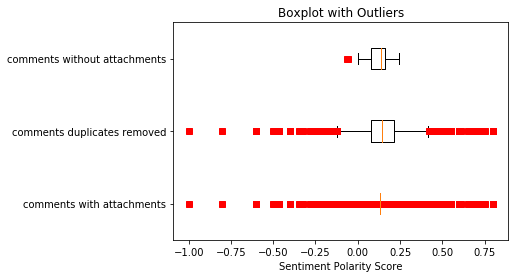

In [12]:
data = [data_with_attachments['sentiment'], data_duplicates_removed['sentiment'], data_attachments_only['sentiment']]

combined = plt.figure()
plt.boxplot(data, 0, 'rs', 0)
plt.title("Boxplot with Outliers")
plt.xlabel("Sentiment Polarity Score")
plt.yticks([1, 2, 3], ["comments with attachments", "comments duplicates removed", "comments without attachments"])
plt.show()
combined.savefig("./data/figures/combined.png", dpi='figure')

/home/nishnha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/home/nishnha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/home/nishnha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater
/home/nishnha/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


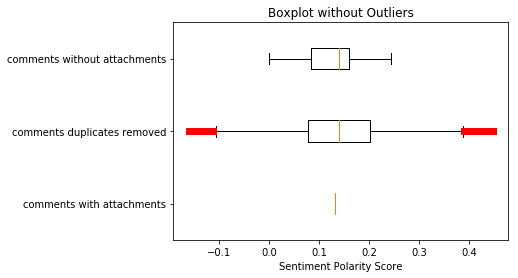

In [13]:
data = [data_with_attachments['sentiment'][~is_outlier(data_with_attachments['sentiment'])], data_duplicates_removed['sentiment'][~is_outlier(data_duplicates_removed['sentiment'])], data_attachments_only['sentiment'][~is_outlier(data_attachments_only['sentiment'])]]

outliers_dropped = plt.figure()
plt.boxplot(data, 0, 'rs', 0)
plt.title("Boxplot without Outliers")
plt.xlabel("Sentiment Polarity Score")
plt.yticks([1, 2, 3], ["comments with attachments", "comments duplicates removed", "comments without attachments"])
plt.show()
outliers_dropped.savefig("./data/figures/outliers_dropped.png")

Save the three datasets which now have sentiment scores.

In [16]:
data_with_attachments.to_json('./data/comments_with_attachments_sentiment.json', orient='records')
data_duplicates_removed.to_json('./data/comments_duplicates_removed_sentiment.json', orient='records')
data_attachments_only.to_json('./data/comments_only_attachments_sentiment.json', orient='records')

Resources: 
https://streamhacker.com/2010/05/10/text-classification-sentiment-analysis-naive-bayes-classifier/
https://web.stanford.edu/~jurafsky/slp3/6.pdf
